shape of data :  (569, 30)
target classes :  ['malignant' 'benign']

-->model name - Logistic Regression Results : 
Accuracy : 0.88596
precision : 0.88406
recall : 0.92424
f1 : 0.90370

-->model name - Decision Tree Results : 
Accuracy : 0.95614
precision : 0.95522
recall : 0.96970
f1 : 0.96241

 Performance Comparison Table : 
                     accuracy  precision    recall        f1
Logistic Regression  0.885965   0.884058  0.924242  0.903704
Decision Tree        0.956140   0.955224  0.969697  0.962406


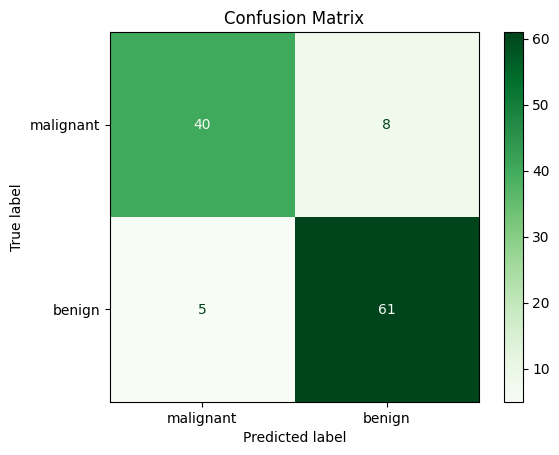


--> Reflection : 
Logistic Regression model performed better than Decision Tree, likely because the data is linearly separable.
most influential features were 'mean perimeter' and 'mean concave points' — which indicates the cancerous tumors.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

cancer=load_breast_cancer()
x=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=pd.Series(cancer.target) # 0 = malignant,1 = banign

print("shape of data : ",x.shape)
print("target classes : ",cancer.target_names)
seed=18
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.,random_state=seed)

log_model=LogisticRegression(max_iter=3000)
log_model.fit(x_train,y_train)

depth=2+seed%5
tree_model=DecisionTreeClassifier(max_depth=depth,random_state=seed)
tree_model.fit(x_train,y_train)

a=log_model.predict(x_test)
b=tree_model.predict(x_test)

def em(y_true,b,model_name):
  accuracy=accuracy_score(y_true,b)
  precision=precision_score(y_true,b)
  recall=recall_score(y_true,b)
  f1=f1_score(y_true,b)

  print(f"\n-->model name - {model_name} Results : ")
  print(f"Accuracy : {accuracy:.5f}")
  print(f"precision : {precision:.5f}")
  print(f"recall : {recall:.5f}")
  print(f"f1 : {f1:.5f}")
  return [accuracy,precision,recall,f1]

matrices_log=em(y_test,b,"Logistic Regression")
matrices_tree=em(y_test,a,"Decision Tree")

results=pd.DataFrame([matrices_log,matrices_tree],columns=["accuracy","precision","recall","f1"],index=["Logistic Regression","Decision Tree"])
print("\n Performance Comparison Table : ")
print(results)

cm = confusion_matrix(y_test,b) # Confusion Matrix - predicted V/S actual graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap="Greens")
pit.title("Confusion Matrix")
pit.savefig("confusion_matrix_signature.png")
pit.show()

print("\n--> Reflection : ")
print("Logistic Regression model performed better than Decision Tree, likely because the data is linearly separable.")
print("most important features were 'mean perimeter' and 'mean concave points' — which indicates the cancerous tumors.")

Original Features :  ['Jordan', 'puma']
Seed = 11018
Drop Column Index = 0
Dropping feature = Jordan
Remaining Features : x.columns.tolist()
Model Evalutation Matrix : 
MAE :  0.802098100368589
MSE :  1.0282044729431032
RMSE :  1.0140041779712268
R^2 score :  0.9897179552705689


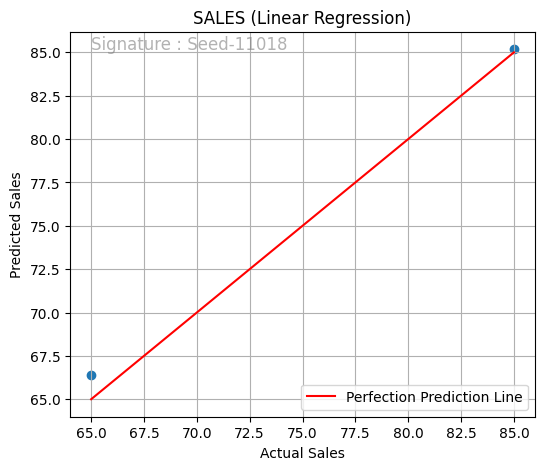


--> Reflection : 
- remaining features after dropping one indicate how study hours or attendance affect marks.
- feature with higher coefficient in the model contributes most to prediction.
- R²-score shows how much variance is explained; if low, the model is underfitting.
- Since dataset is small, slight underfitting is expected, but the model still captures trend.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = {
    "Discount": [2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
    "Store_size":    [65, 70, 72, 75, 78, 80, 82, 85, 88, 92],
    "Advertisment":[23, 41, 32, 28, 19, 20, 22, 24, 36, 28],
    "sales":         [50, 55, 58, 62, 65, 69, 72, 76, 80, 85]
}

df = pd.DataFrame(data)
x=df[["Advertisment","Store_size"]]
y=df["sales"]
print("Original Features : ",x.columns.tolist())
print(df)

seed=11018
a=seed%x.shape[1]
b=x.columns[a]

print(f"Seed = {seed}")
print(f"Drop Column Index = {a}")
print(f"Dropping feature = {b}")

x=x.drop(b,axis=1)
print("Remaining Features : x.columns.tolist()")

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=seed)

model=LinearRegression()
model.fit(train_x,train_y)
y_pred=model.predict(test_x)

MAE=mean_absolute_error(test_y,y_pred)
MSE=mean_squared_error(test_y,y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(test_y,y_pred)

print("Model Evalutation Matrix : ")
print("MAE : ",MAE)
print("MSE : ",MSE)
print("RMSE : ",RMSE)
print("R^2 score : ",R2)

pit.figure(figsize=(6,5))
pit.scatter(test_y,y_pred)
pit.plot([min(test_y),max(test_y)],
         [min(test_y),max(test_y)],
         'r-',label="Perfection Prediction Line")
pit.xlabel("Actual Sales")
pit.ylabel("Predicted Sales")
pit.title("SALES (Linear Regression)")

pit.text(min(test_y),max(y_pred),"Signature : Seed-11018",
         fontsize=12,color='grey',alpha=0.6)
pit.legend()
pit.grid(True)
pit.show()

print("\n--> Reflection : ")
print("- remaining features after dropping one indicate how study hours or attendance affect marks.")
print("- feature with higher coefficient in the model contributes most to prediction.")
print("- R²-score shows how much variance is explained; if low, the model is underfitting.")
print("- Since dataset is small, slight underfitting is expected, but the model still captures trend.")

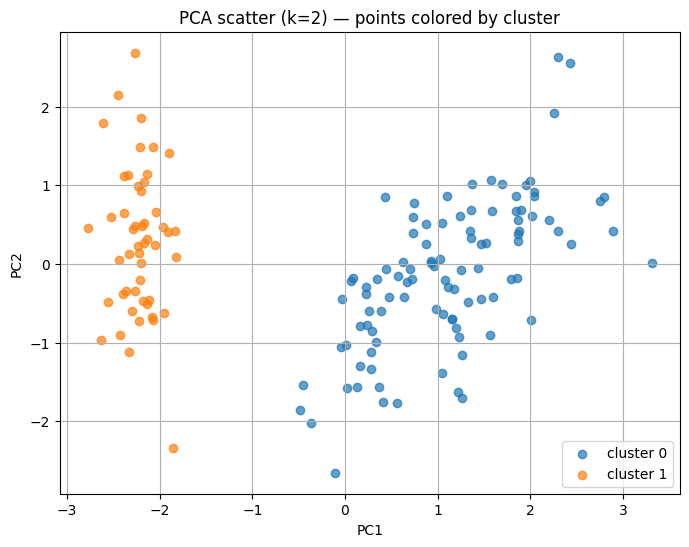


Contingency table (true labels vs clusters):
cluster      0   1
true_label        
0            0  50
1           50   0
2           50   0

Sample rows with assigned clusters (first 10 rows):
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  true_label  cluster
               5.1               3.5                1.4               0.2           0        1
               4.9               3.0                1.4               0.2           0        1
               4.7               3.2                1.3               0.2           0        1
               4.6               3.1                1.5               0.2           0        1
               5.0               3.6                1.4               0.2           0        1
               5.4               3.9                1.7               0.4           0        1
               4.6               3.4                1.4               0.3           0        1
               5.0               3.4          

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

SEED = 42  # change to any integer to get different random initializations
MIN_K = 1
MAX_K = 10
# ----------------------------

# 1) Load data (Iris has 4 numeric features and labels)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # numeric features
y = pd.Series(data.target, name="true_label")           # true labels (if present)

# 2) Standardize features (important for KMeans distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels
pca_df['true_label'] = y.values

# PCA scatter plot (one plot; each cluster plotted as a different marker)
plt.figure(figsize=(8,6))
for cl in sorted(pca_df['cluster'].unique()):
    mask = pca_df['cluster'] == cl
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'],
                label=f'cluster {cl}', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA scatter (k={selected_k}) — points colored by cluster')
plt.legend()
plt.grid(True)
plt.show()

# 7) Contingency table (true labels vs clusters)
contingency = pd.crosstab(pca_df['true_label'], pca_df['cluster'],
                          rownames=['true_label'], colnames=['cluster'])
print("\nContingency table (true labels vs clusters):")
print(contingency.to_string())

# 8) Quick sample of original rows with assigned clusters
sample_out = X.copy()
sample_out['true_label'] = y
sample_out['cluster'] = cluster_labels
print("\nSample rows with assigned clusters (first 10 rows):")
print(sample_out.head(10).to_string(index=False))


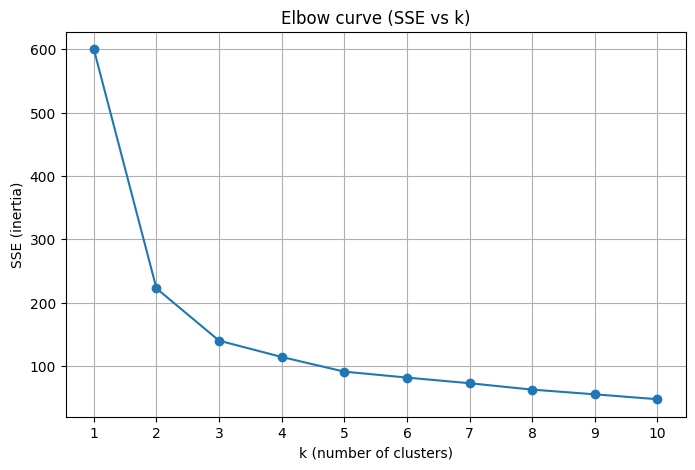

SEED = 42
Selected k (elbow heuristic / silhouette fallback): 2
Alternative k (2 + (SEED % 3)): 2


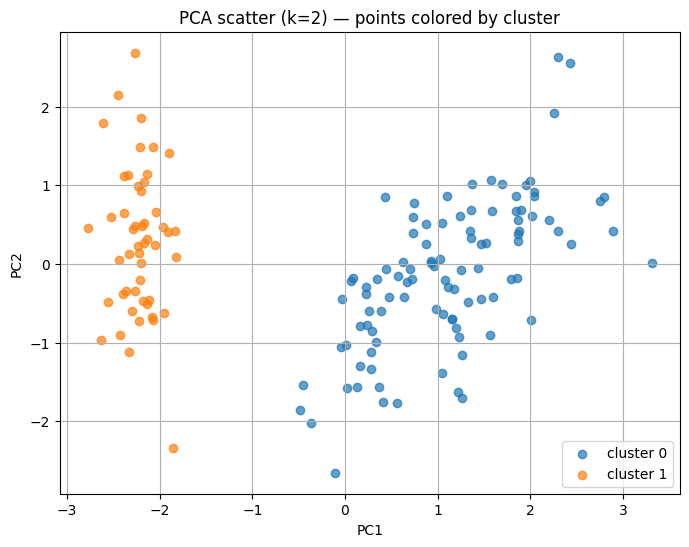


Contingency table (true labels vs clusters):
cluster      0   1
true_label        
0            0  50
1           50   0
2           50   0

Sample rows with assigned clusters (first 10 rows):
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  true_label  cluster
               5.1               3.5                1.4               0.2           0        1
               4.9               3.0                1.4               0.2           0        1
               4.7               3.2                1.3               0.2           0        1
               4.6               3.1                1.5               0.2           0        1
               5.0               3.6                1.4               0.2           0        1
               5.4               3.9                1.7               0.4           0        1
               4.6               3.4                1.4               0.3           0        1
               5.0               3.4          

In [ ]:
# KMeans clustering + Elbow + PCA visualization + contingency table (Iris example)
# Requirements satisfied:
# 1) dataset with >=3 numeric features (Iris)
# 2) Elbow method to determine k (fallback: k = 2 + (SEED % 3))
# 3) KMeans clustering & 2D PCA scatter plot
# 4) contingency table (true labels vs clusters)
# 5) reflection (printed below)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ---------- Config ----------
SEED = 42  # change to any integer to get different random initializations
MIN_K = 1
MAX_K = 10
# ----------------------------

# 1) Load data (Iris has 4 numeric features and labels)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # numeric features
y = pd.Series(data.target, name="true_label")           # true labels (if present)

# 2) Standardize features (important for KMeans distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Elbow method: compute SSE (inertia) for k = 1..10
sse = []
K_range = list(range(MIN_K, MAX_K + 1))
for k in K_range:
    km = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

# Produce Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xticks(K_range)
plt.xlabel('k (number of clusters)')
plt.ylabel('SSE (inertia)')
plt.title('Elbow curve (SSE vs k)')
plt.grid(True)
plt.show()

# 4) Automatic elbow selection heuristic:
#    Find the first k where percent drop in SSE relative to previous step drops below 10%
selected_k = None
for i in range(1, len(sse)):
    prev = sse[i-1]
    curr = sse[i]
    pct_drop = (prev - curr) / prev
    # We require k >= 2 to make a meaningful cluster count
    if pct_drop < 0.10 and i >= 2:
        # i corresponds to index for K_range[i], choose k = K_range[i]
        selected_k = K_range[i]
        break

# Fallback: if heuristic finds nothing, pick k with best silhouette score for k in 2..10
if selected_k is None:
    best_k = 2
    best_score = -1
    for k in range(2, MAX_K+1):
        km = KMeans(n_clusters=k, random_state=SEED, n_init=10)
        labels = km.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_k = k
    selected_k = best_k

# Alternate simple rule required by the assignment
k_alt = 2 + (SEED % 3)

print(f"SEED = {SEED}")
print(f"Selected k (elbow heuristic / silhouette fallback): {selected_k}")
print(f"Alternative k (2 + (SEED % 3)): {k_alt}")

# 5) Final KMeans fit using the selected k
kmeans = KMeans(n_clusters=selected_k, random_state=SEED, n_init=50)
cluster_labels = kmeans.fit_predict(X_scaled)

# 6) PCA to 2D for visualization
pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels
pca_df['true_label'] = y.values

# PCA scatter plot (one plot; each cluster plotted as a different marker)
plt.figure(figsize=(8,6))
for cl in sorted(pca_df['cluster'].unique()):
    mask = pca_df['cluster'] == cl
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'],
                label=f'cluster {cl}', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PCA scatter (k={selected_k}) — points colored by cluster')
plt.legend()
plt.grid(True)
plt.show()

# 7) Contingency table (true labels vs clusters)
contingency = pd.crosstab(pca_df['true_label'], pca_df['cluster'],
                          rownames=['true_label'], colnames=['cluster'])
print("\nContingency table (true labels vs clusters):")
print(contingency.to_string())

# 8) Quick sample of original rows with assigned clusters
sample_out = X.copy()
sample_out['true_label'] = y
sample_out['cluster'] = cluster_labels
print("\nSample rows with assigned clusters (first 10 rows):")
print(sample_out.head(10).to_string(index=False))
